<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read CSV
house_hold_csv = "Data/Family Income and Expenditure.csv"
fies = pd.read_csv(house_hold_csv)

In [4]:
# Head
fies.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [5]:
fies.columns = fies.columns.str.lower().str.replace(' ', '_')
fies.columns

Index(['total_household_income', 'region', 'total_food_expenditure',
       'main_source_of_income', 'agricultural_household_indicator',
       'bread_and_cereals_expenditure', 'total_rice_expenditure',
       'meat_expenditure', 'total_fish_and__marine_products_expenditure',
       'fruit_expenditure', 'vegetables_expenditure',
       'restaurant_and_hotels_expenditure', 'alcoholic_beverages_expenditure',
       'tobacco_expenditure', 'clothing,_footwear_and_other_wear_expenditure',
       'housing_and_water_expenditure', 'imputed_house_rental_value',
       'medical_care_expenditure', 'transportation_expenditure',
       'communication_expenditure', 'education_expenditure',
       'miscellaneous_goods_and_services_expenditure',
       'special_occasions_expenditure', 'crop_farming_and_gardening_expenses',
       'total_income_from_entrepreneurial_acitivites', 'household_head_sex',
       'household_head_age', 'household_head_marital_status',
       'household_head_highest_grade_compl

In [20]:
# Tail
fies.tail()

,total household income,region,total food expenditure,main source of income,agricultural household indicator,bread and cereals expenditure,total rice expenditure,meat expenditure,total fish and marine products expenditure,fruit expenditure,...,number of refrigerator/freezer,number of washing machine,number of airconditioner,"number of car, jeep, van",number of landline/wireless telephones,number of cellular phone,number of personal computer,number of stove with oven/gas range,number of motorized banca,number of motorcycle/tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [21]:
# Shape
fies.shape

(41544, 60)

In [22]:
# Data Types
fies.dtypes

total household income                            int64
region                                           object
total food expenditure                            int64
main source of income                            object
agricultural household indicator                  int64
bread and cereals expenditure                     int64
total rice expenditure                            int64
meat expenditure                                  int64
total fish and  marine products expenditure       int64
fruit expenditure                                 int64
vegetables expenditure                            int64
restaurant and hotels expenditure                 int64
alcoholic beverages expenditure                   int64
tobacco expenditure                               int64
clothing, footwear and other wear expenditure     int64
housing and water expenditure                     int64
imputed house rental value                        int64
medical care expenditure                        

In [31]:
fies.count()

total household income                           41544
region                                           41544
total food expenditure                           41544
main source of income                            41544
agricultural household indicator                 41544
bread and cereals expenditure                    41544
total rice expenditure                           41544
meat expenditure                                 41544
total fish and  marine products expenditure      41544
fruit expenditure                                41544
vegetables expenditure                           41544
restaurant and hotels expenditure                41544
alcoholic beverages expenditure                  41544
tobacco expenditure                              41544
clothing, footwear and other wear expenditure    41544
housing and water expenditure                    41544
imputed house rental value                       41544
medical care expenditure                         41544
transporta

In [33]:
#check data consistency
fies.isna().sum()

total household income                              0
region                                              0
total food expenditure                              0
main source of income                               0
agricultural household indicator                    0
bread and cereals expenditure                       0
total rice expenditure                              0
meat expenditure                                    0
total fish and  marine products expenditure         0
fruit expenditure                                   0
vegetables expenditure                              0
restaurant and hotels expenditure                   0
alcoholic beverages expenditure                     0
tobacco expenditure                                 0
clothing, footwear and other wear expenditure       0
housing and water expenditure                       0
imputed house rental value                          0
medical care expenditure                            0
transportation expenditure  

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

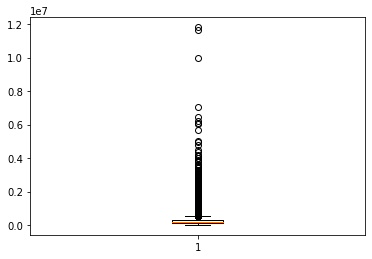

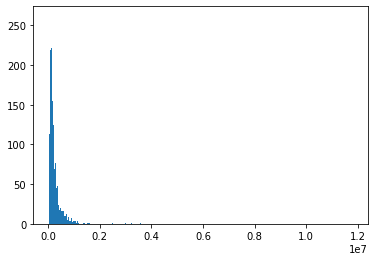

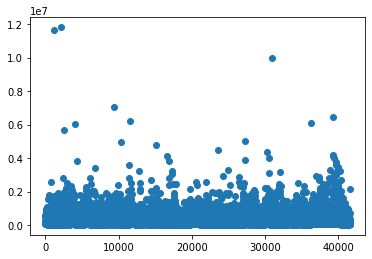

In [31]:
# ANSWER
_ = plt.boxplot(x='total_household_income', data=fies)
plt.show()
_ = plt.hist(x='total_household_income', data=fies, bins=(int(len(fies)/4)))
plt.show()
_ = plt.scatter(y='total_household_income', x=range(len(fies)), data=fies)


In [77]:
fies.total_household_income.mean()

247555.58480165608

In [112]:
fies.total_household_income.median()

164079.5

In [114]:
fies.total_household_income.describe()

count    4.154400e+04
mean     2.475556e+05
std      2.868805e+05
min      1.128500e+04
25%      1.048950e+05
50%      1.640795e+05
75%      2.911385e+05
max      1.181599e+07
Name: total_household_income, dtype: float64

In [35]:
#define IQR
Q1 = fies.quantile(0.25)
Q3 = fies.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

total_household_income                           186243.50
total_food_expenditure                            54618.25
agricultural_household_indicator                      1.00
bread_and_cereals_expenditure                     14883.00
total_rice_expenditure                            12900.00
meat_expenditure                                  10938.25
total_fish_and__marine_products_expenditure        7884.00
fruit_expenditure                                  2075.25
vegetables_expenditure                             3431.25
restaurant_and_hotels_expenditure                 17991.25
alcoholic_beverages_expenditure                    1299.25
tobacco_expenditure                                3146.50
clothing,_footwear_and_other_wear_expenditure      4215.00
housing_and_water_expenditure                     32868.00
imputed_house_rental_value                        18000.00
medical_care_expenditure                           4380.00
transportation_expenditure                        11364.

In [75]:
#making a new DF based on the IQR to remove outliers
fies_IQR = fies[~((fies < (Q1 - 1.5 * IQR)) |(fies > (Q3 + 1.5 * IQR))).any(axis=1)]

/var/folders/wh/5l_c08654yvfc0h71fmq8pxr0000gn/T/ipykernel_1978/351061501.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fies_IQR = fies[~((fies < (Q1 - 1.5 * IQR)) |(fies > (Q3 + 1.5 * IQR))).any(axis=1)]
/var/folders/wh/5l_c08654yvfc0h71fmq8pxr0000gn/T/ipykernel_1978/351061501.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fies_IQR = fies[~((fies < (Q1 - 1.5 * IQR)) |(fies > (Q3 + 1.5 * IQR))).any(axis=1)]


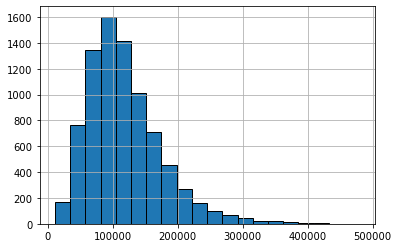

In [78]:
#hist of new DF
plt.hist(x='total_household_income',data=fies_IQR, edgecolor='black',bins=20)
plt.grid(b=True)

##### 2. How would you describe the shape of this population?

##### 2. What is the mean income of this population?

In [131]:
# ANSWER
fies.total_household_income.mean()

247555.58480165608

##### 3. What statistical theory could you use to estimate the mean of this population if you were given a random sample from the population?

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [41]:
# ANSWER
sample_mean = []
for i in range(10):
    sample_mean.append(fies.total_household_income.sample(n=5).mean())

sample_mean_IQR = []
for i in range(10):
    sample_mean_IQR.append(fies_new.total_household_income.sample(n=5).mean())
    

##### 4.A Make a histogram of all the sample means

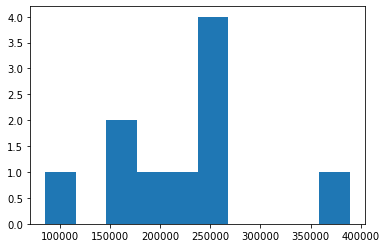

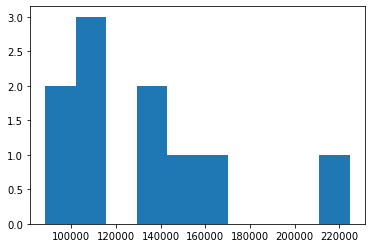

In [43]:
# ANSWER
_ = plt.hist(x=sample_mean)
plt.show()
_ = plt.hist(x=sample_mean_IQR)

##### 4.B Describe the shape of the histogram.

##### 5. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

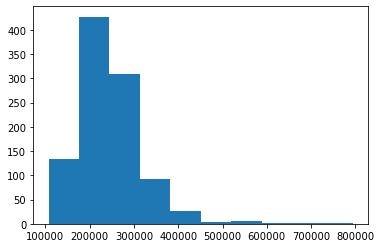

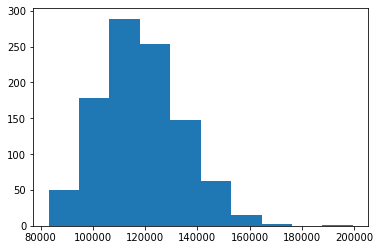

In [52]:
# ANSWER
sample_mean = []
for i in range(1000):
    sample_mean.append(fies.total_household_income.sample(n=15).mean())

sample_mean_new = []
for i in range(1000):
    sample_mean_new.append(fies_new.total_household_income.sample(n=15).mean())

_ = plt.hist(x=sample_mean)
plt.show()

_ = plt.hist(x=sample_mean_IQR)
plt.show()

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

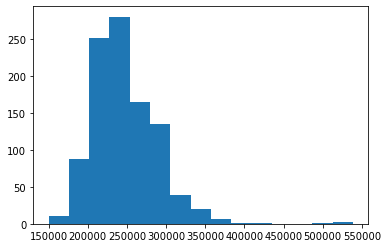

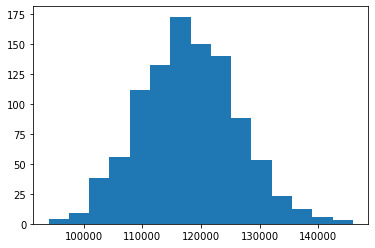

In [56]:
# ANSWER
sample_mean = []
for i in range(1000):
    sample_mean.append(fies.total_household_income.sample(n=50).mean())

sample_mean_IQR = []
for i in range(1000):
    sample_mean_new.append(fies_new.total_household_income.sample(n=50).mean())

_ = plt.hist(x=sample_mean,bins=15)
plt.show()

_ = plt.hist(x=sample_mean_IQR, bins=15)
plt.show()

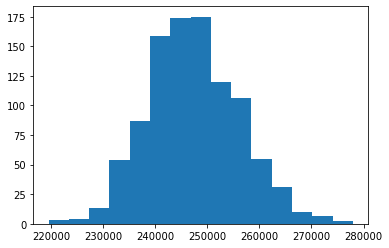

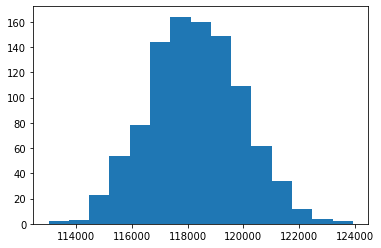

In [65]:
# 1000 samples of sample size 1000
sample_mean = []
for i in range(1000):
    sample_mean.append(fies.total_household_income.sample(n=1000).mean())

sample_mean_IQR = []
for i in range(1000):
    sample_mean_IQR.append(fies_new.total_household_income.sample(n=1000).mean())

_ = plt.hist(x=sample_mean,bins=15)
plt.show()

_ = plt.hist(x=sample_mean_IQR, bins=15)
plt.show()

##### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

?ANSWER: as we can see the shape start to look more and more like a normal distribution which is in line with the CTL

##### 8.B What is mean of the distribution of sample means?

In [66]:
# ANSWER
print(np.mean(sample_mean))
print(np.mean(sample_mean_IQR))

247397.83399400002
118267.95741


?ANSWER:

##### 8.C As the sample size grew, did your results confirm the CLT?

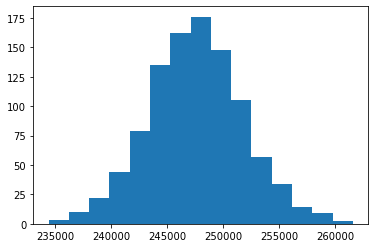

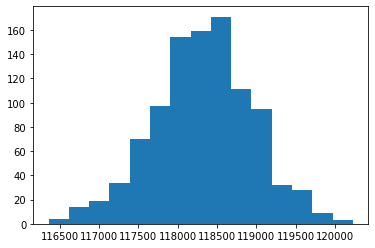

In [71]:
# 1000 samples of sample size 10%
sample_mean = []
for i in range(1000):
    sample_mean.append(fies.total_household_income.sample(n=int(len(fies.total_household_income)*0.1)).mean())

sample_mean_IQR = []
for i in range(1000):
    sample_mean_IQR.append(fies_new.total_household_income.sample(n=int(len(fies.total_household_income)*0.1)).mean())

_ = plt.hist(x=sample_mean,bins=15)
plt.show()

_ = plt.hist(x=sample_mean_IQR, bins=15)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



